In [1]:
import importlib
import os
import torch
import torchvision.transforms as T
from skimage import io
from skimage.io import imread, imsave, imshow

import matplotlib.pyplot as plt
from PIL import Image, ImageOps, ImageChops

import numpy as np
import random
from skimage import transform

np.set_printoptions(threshold=np.inf)

In [2]:
root = "/home/vision/smb-datasets/ecommerce/"

ecommerce = root + "ecommerce_pidinet/"
images = root + "images/train/"
pidinet = root + "ecommerce_pidinet/"
sketches = root + "sketches/train/"
sketches_valid = root + "sketches_valid/"
ecommerce_pidinet = "/users/btorres/databases/ecommerce/pidinet_gaussian1/"
ecommerce_color = '/users/btorres/databases/ecommerce/pidinet_color_quanta16_layer/'




im = "/sueter/f0225fb37359ad5a26575007f76ec0a1.png"
im = "/zapatos/fec941e8f2704d4783bbe081857051ac_5.png"

sket = "/valid/11.PNG"



torch.Size([400, 400, 3])


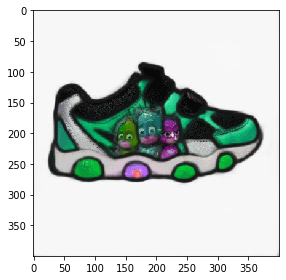

In [3]:
img = imread(ecommerce_color + im)
tor = torch.from_numpy(img)
print(tor.shape)
imshow(img)

In [ ]:
def liquifyIn( xy, center, strength, curve):
    x, y = xy.T
    x0, y0 = center
    rho = np.sqrt((x - x0) ** 2 + (y - y0) ** 2)
    theta = np.arctan2(y - y0, x - x0)

    rho = rho * (np.exp(-(rho*curve) + np.log(strength)) + 1)

    xy[..., 0] = x0 + rho * np.cos(theta)
    xy[..., 1] = y0 + rho * np.sin(theta)

    return xy


def liquify(img_warp, curve=0.05, strength=2.3):

    for i in range(6):

        center = (random.randint(50, 350), random.randint(50, 350))
        func = lambda xy : liquifyIn(xy, center, strength, curve)

        img_warp = transform.warp(img_warp, func, mode='edge')

    return img_warp

class RandomLiquify(object):
    def __init__(self, prob=0.5):
        self.prob = prob

    def __call__(self, image):

        p = random.uniform(0, 1)
        img = image.numpy()

        if p < self.prob:
            img = torch.nn.functional.grid_sample()

        return torch.from_numpy(img)

In [176]:
center = (-0.5,-0.5)
curve = 1.1
strength = 0.03
size = (400, 400)
steps = 10


grid_x = torch.zeros(size)
grid_y = torch.zeros(size)

fieldflow = torch.zeros((size[0], size[1],2))

init_x, init_y = torch.meshgrid(torch.linspace(-1, 1, size[0]),
                                torch.linspace(-1, 1, size[1]),
                                indexing='ij')


result = tor.clone()

result = result.unsqueeze(dim=0)
result = result.movedim(-1, 1)


for i in range(steps):

    center = (random.uniform(-0.9, 0.9), random.uniform(-0.9, 0.9))
    #center = (0.0, 0.0)


    rho = torch.sqrt((init_x - center[0]) ** 2 + (init_y - center[1]) ** 2)
    theta = torch.arctan2(init_y - center[1], init_x - center[0])

    auxrho = 1 * (torch.exp(-(rho*curve) + np.log(strength)))


    fieldflow[:,:,0] = init_x + auxrho * torch.cos(theta)
    fieldflow[:,:,1] = init_y + auxrho * torch.sin(theta)


    fieldflow = fieldflow.unsqueeze(dim=0)

    result = torch.nn.functional.grid_sample(result.float(), fieldflow.float(), padding_mode='border', align_corners = True)

    fieldflow = fieldflow.squeeze(dim=0)


torch.Size([1, 3, 400, 400])
(400, 400, 3)


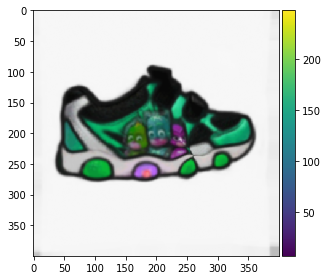

In [177]:
print(result.shape)
rel = result.int().squeeze(dim=0).movedim(0, -1).numpy()
print(rel.shape)

imshow(rel)

In [ ]:
import torch
import torch.nn.functional as F
import numpy as np

sz = 5
input_arr = torch.from_numpy(np.arange(sz*sz).reshape(1,1,sz,sz)).float()
indices = torch.from_numpy(np.array([-1,-1, -0.5,-0.5, 0,0, 0.5,0.5, 1,1]).reshape(1, 1, 5, 2)).float()

out = F.grid_sample(input_arr, indices)
print(indices)
print(input_arr)
print(out)